In [1]:
import pandas as pd
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv("abalone_data.csv") 

In [3]:
df['rings_val']=(df['rings']-min(df['rings']))/max(df['rings'])
df=df.drop(['rings'], axis=1)

df['shucked_weight_norm']=(df['shucked_weight']-min(df['shucked_weight']))/max(df['shucked_weight'])
df=df.drop(['shucked_weight'], axis=1)

dataset=df[['lenght','height','rings_val','shucked_weight_norm']]
from sklearn.neighbors import LocalOutlierFactor



In [4]:
X= array([ dataset.iloc[i] for i in range(len(dataset))])
# fit the model
clf = LocalOutlierFactor(n_neighbors=910)
y_pred = clf.fit_predict(X)


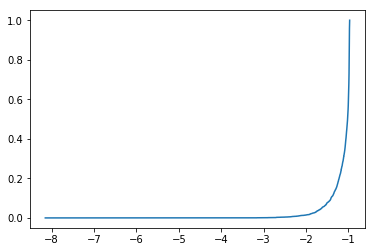

In [5]:
xx = np.linspace(min(clf.negative_outlier_factor_),max(clf.negative_outlier_factor_),100000)
yy = list()
for nlof in xx:
    y_outliers=X[clf.negative_outlier_factor_<=nlof]
    # yy = size of noise cluster
    yy.append(float(len(y_outliers)) / len(X))
plot(xx, yy)


In [6]:
my_nlof = max( [ xx[i] for i in range(len(xx)) if yy[i]<0.01] )
print (my_nlof)


-2.17576892294


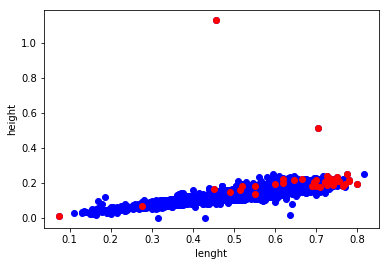

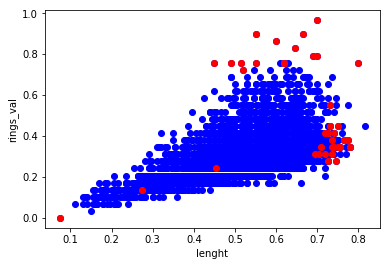

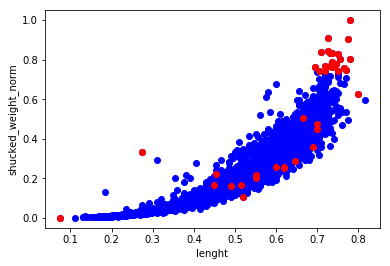

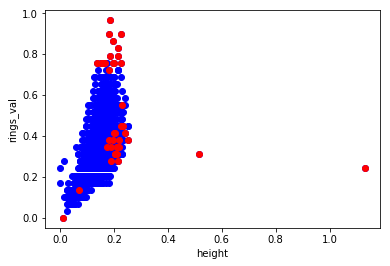

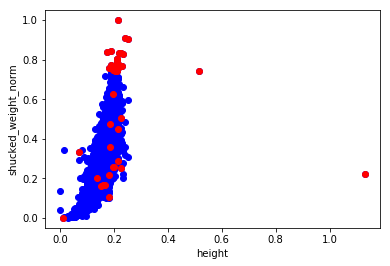

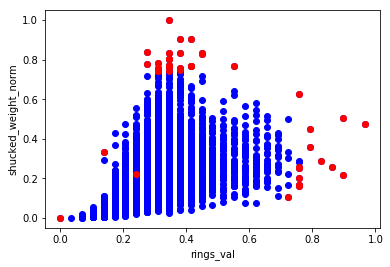

In [7]:
for i in range(8):
    for j in range(4):
        if i<j:
            y_outliers=X[clf.negative_outlier_factor_<=my_nlof]
            plot(X[:,i], X[:,j], 'bo')
            plot(y_outliers[:,i], y_outliers[:,j], 'ro')
            xlabel(dataset.columns[i])
            ylabel(dataset.columns[j])
            show()
